Movie reviews can be classified as either favorable or not. The evaluation of movie review text
is a classification problem often called sentiment analysis. A popular technique for developing
sentiment analysis models is to use a bag-of-words model that transforms documents into vectors
where each word in the document is assigned a score

In [1]:
from os import listdir


def load_doc(filename):
    file = open(filename,'r')
    
    text = file.read()
    
    file.close()
    
    return text

Next, the process docs() function from the previous section needs to be modified to
selectively process reviews in the test or train dataset. We support the loading of both the
training and test datasets by adding an is train argument and using that to decide what
review file names to skip

In [2]:
def process_docs(dir,vocab,isTrain):
    lines = list()
    
    for filename in listdir(dir):
        #Skip any reviews in the test set 
        if isTrain and filename.startswith('cv9'):
            continue
        if not isTrain and not filename.startswith('cv9'):
            continue
        
        path = dir+'/'+filename
        line = doc_to_line(path,vocab)
        lines.append(line)
        
    return lines

In [3]:
def doc_to_line(dir,vocab):
    text = load_doc(dir)
    tokens = preprocessing_pipeline(text)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [4]:
def save_list(lines,filename):
    text = '\n'.join(lines)
    file = open(filename,'w')
    file.write(text)
    file.close()

In [5]:
import string
import nltk

stop_words = nltk.corpus.stopwords.words('english')
def preprocessing_pipeline(tokens):
    tokens = tokens.split()
    preprocessed_text = [w for w in tokens if w not in string.punctuation] # Removing punctuation
    preprocessed_text = [w for w in preprocessed_text if w.isalpha()] # Removing everything except words
    preprocessed_text = [w.lower() for w in preprocessed_text] # to lower case
    preprocessed_text = [w for w in preprocessed_text if w not in stop_words]
    preprocessed_text = [w for w in preprocessed_text if len(w) > 1] # filtering short tokens
    return preprocessed_text

In [6]:
def load_clean_datasets(vocab,isTrain):
    neg = process_docs('review_polarity/txt_sentoken/neg',vocab,isTrain)
    pos = process_docs('review_polarity/txt_sentoken/pos',vocab,isTrain)
    
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs,labels

We will use the Keras API to convert reviews to encoded document vectors. Keras provides
the Tokenizer class that can do some of the cleaning and vocab definition tasks that we took
care of in the previous section

In [7]:
print(docs)

NameError: name 'docs' is not defined

In [8]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer as tk

def create_tokenizer(lines):
    tokenizer = tk()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [9]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [10]:
train_docs, ytrain = load_clean_datasets(vocab,True)
test_docs, ytest = load_clean_datasets(vocab,False)

In [14]:
print(train_docs[0])

plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares deal watch movie sorta find critique movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal fantasy world audience member idea going dreams characters coming back dead others look like dead strange apparitions chase scenes tons weird things happen simply explained personally mind trying unravel film every give clue get kind fed biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually figured point strangeness start make little bit sense still make film 

In [15]:
print(train_docs[1])

happy quick movie review damn bug got head start movie starring jamie lee curtis another baldwin brother william time story regarding crew comes across deserted russian tech ship strangeness kick power back little know power within going gore bringing action sequences virus still feels empty like movie going flash substance know crew really middle nowhere know origin took ship big pink flashy thing hit mir course know donald sutherland stumbling around throughout hey chase people around robots acting average even likes curtis likely get kick work halloween sutherland wasted baldwin well acting like baldwin course real star stan robot design cgi occasional good gore shot like picking brain robots body parts really turn movie otherwise pretty much ship movie


In [63]:
# Create the tokenizer
tokenizer = create_tokenizer(train_docs) 

In [64]:
Xtrain = tokenizer.texts_to_matrix(train_docs,mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs,mode='freq')

In [65]:
#Running the example prints both the shape of the encoded training dataset and test dataset
#with 1,800 and 200 documents respectively, each with the same sized encoding vocabulary
#(vector length).
print(Xtrain.shape,Xtest.shape)

(1800, 13850) (200, 13850)


In [66]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
# Sentimental Analysis model 

# Our MLP model will have an input layer that equals the number of words in the vocabulary

n_words = Xtest.shape[1]

def build_model(n_words):
    model = Sequential()
    model.add(Dense(50,input_shape=(n_words,),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
  #  plot_model(model,to_file='model.png',show_shapes=True)
    return model

In [68]:
import numpy as np
Xtrain,Ytrain,Xtest,Ytest = np.array(Xtrain),np.array(ytrain),np.array(Xtest),np.array(ytest)

In [69]:
print(Xtrain.shape,Ytrain.shape)

(1800, 13850) (1800,)


In [70]:
# Fit the network
model = build_model(n_words)
model.fit(Xtrain,Ytrain,epochs=15,verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                692550    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 692,601
Trainable params: 692,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
57/57 - 1s - loss: 0.6918 - accuracy: 0.4944
Epoch 2/15
57/57 - 1s - loss: 0.6840 - accuracy: 0.7322
Epoch 3/15
57/57 - 1s - loss: 0.6665 - accuracy: 0.8517
Epoch 4/15
57/57 - 1s - loss: 0.6375 - accuracy: 0.8928
Epoch 5/15
57/57 - 1s - loss: 0.5967 - accuracy: 0.9283
Epoch 6/15
57/57 - 1s - loss: 0.5491 - accuracy: 0.9372
Epoch 7/15
57/57 - 1s - loss: 0.4996 - accuracy: 0.9322
Epoch 8/15
57/57 - 1s - loss: 0.4510 - accuracy: 0.9478
Epoch 9/15
57/57 - 1s - loss: 0.4065 - accuracy: 0.9517
Epoch 

In [71]:
loss,acc = model.evaluate(Xtest,Ytest)
print(loss)
print(acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.3771 - accuracy: 0.8850
0.3770860731601715
0.8849999904632568


# Comparing Word scoring methods

The texts to matrix() function for the Tokenizer in the Keras API provides 4 different
methods for scoring words; they are:
 binary Where words are marked as present (1) or absent (0).
 count Where the occurrence count for each word is marked as an integer.
 tfidf Where each word is scored based on their frequency, where words that are common
across all documents are penalized.
 freq Where words are scored based on their frequency of occurrence within the document.


In [72]:
def prepare_model(train_docs,test_docs,mode):
    tokenizer = tk()
    tokenizer.fit_on_texts(train_docs)
    
    Xtrain = tokenizer.texts_to_matrix(train_docs,mode=mode)
    Xtest = tokenizer.texts_to_matrix(test_docs,mode=mode)
    
    return Xtrain,Xtest

#Evaludate a nn model

We also need a function to evaluate the MLP given a specific encoding of the data. Because
neural networks are stochastic, they can produce different results when the same model is fit on
the same data. This is mainly because of the random initial weights and the shuffling of patterns
during mini-batch gradient descent. This means that any one scoring of a model is unreliable
and we should estimate model skill based on an average of multiple runs

In [77]:
def evaluate_model(Xtrain,Ytrain,Xtest,Ytest):
    scores = list()
    for i in range(10):
        model = build_model(Xtrain.shape[1])
        model.fit(Xtrain,Ytrain,epochs=10)
        loss,acc = model.evaluate(Xtest,Ytest)
        scores.append(acc)
    return scores

In [78]:
import pandas as pd
modes = ['binary','count','tfidf','freq']
results = pd.DataFrame()

for mode in modes:
    Xtrain,Xtest = prepare_model(train_docs,test_docs,mode)

    results[mode] = evaluate_model(Xtrain,Ytrain,Xtest,Ytest)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 50)                692550    
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 51        
Total params: 692,601
Trainable params: 692,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 [==============================] - 1s 11ms/step - loss: 0.5806 - accuracy: 0.6755
Epoch 2/10
57/57 [==============================] - 1s 13ms/step - loss: 0.1051 - accuracy: 0.9922
Epoch 3/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0295 - accuracy: 0.9991
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 6/10
57/

57/57 [==============================] - 1s 11ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.9250
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 50)                692550    
_________________________________________________________________
dense_95 (Dense)             (Non

Epoch 1/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5998 - accuracy: 0.6275
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.1018 - accuracy: 0.9812
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8850
Model: "sequ

Epoch 1/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5585 - accuracy: 0.7128
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0780 - accuracy: 0.9889
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 1s 15ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 1s 15ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8950
Model: "sequ

Epoch 1/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5717 - accuracy: 0.6877
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0253 - accuracy: 0.9995
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 1s 17ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 9.2118e-04 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 1s 14ms/step - loss: 8.1709e-04 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 1s 14ms/step - loss: 8.6881e-04 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.8600


Epoch 1/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5813 - accuracy: 0.6724
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0316 - accuracy: 0.9991
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 5/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/10
57/57 [==============================] - 1s 10ms/step - loss: 9.3707e-04 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 1s 10ms/step - loss: 7.6600e-04 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 1s 10ms/step - loss: 5.8723e-04 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8700


Epoch 1/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5566
Epoch 2/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6854 - accuracy: 0.8669
Epoch 3/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6689 - accuracy: 0.8922
Epoch 4/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6399 - accuracy: 0.9296
Epoch 5/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6013 - accuracy: 0.9183
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5572 - accuracy: 0.9329
Epoch 7/10
57/57 [==============================] - 1s 11ms/step - loss: 0.5169 - accuracy: 0.9455
Epoch 8/10
57/57 [==============================] - 1s 10ms/step - loss: 0.4652 - accuracy: 0.9489
Epoch 9/10
57/57 [==============================] - 1s 11ms/step - loss: 0.4189 - accuracy: 0.9593
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.8950
Model: "sequ

Epoch 1/10
57/57 [==============================] - 2s 10ms/step - loss: 0.6924 - accuracy: 0.5108
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.6835 - accuracy: 0.8568 0s - loss: 0.6852 - 
Epoch 3/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6670 - accuracy: 0.7521
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6373 - accuracy: 0.9242
Epoch 5/10
57/57 [==============================] - 1s 12ms/step - loss: 0.5980 - accuracy: 0.9297
Epoch 6/10
57/57 [==============================] - 1s 11ms/step - loss: 0.5554 - accuracy: 0.9199
Epoch 7/10
57/57 [==============================] - 1s 11ms/step - loss: 0.5015 - accuracy: 0.9444
Epoch 8/10
57/57 [==============================] - 1s 11ms/step - loss: 0.4598 - accuracy: 0.9430
Epoch 9/10
57/57 [==============================] - 1s 10ms/step - loss: 0.4156 - accuracy: 0.9414
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy

In [79]:
print(results)

   binary  count  tfidf   freq
0   0.925  0.905  0.885  0.860
1   0.920  0.905  0.875  0.890
2   0.925  0.885  0.890  0.875
3   0.925  0.905  0.890  0.865
4   0.915  0.885  0.860  0.895
5   0.940  0.895  0.885  0.870
6   0.920  0.885  0.860  0.885
7   0.940  0.900  0.875  0.890
8   0.915  0.890  0.855  0.895
9   0.925  0.895  0.870  0.885


In [80]:
#At the end of the run, summary statistics for each word scoring method are provided,
#summarizing the distribution of model skill scores across each of the 10 runs per mode. We can
#see that the mean score of both the count and binary methods appear to be better than freq
#and tfidf.

print(results.describe())

          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.925000   0.895000   0.874500   0.881000
std     0.008819   0.008498   0.013006   0.012649
min     0.915000   0.885000   0.855000   0.860000
25%     0.920000   0.886250   0.862500   0.871250
50%     0.925000   0.895000   0.875000   0.885000
75%     0.925000   0.903750   0.885000   0.890000
max     0.940000   0.905000   0.890000   0.895000


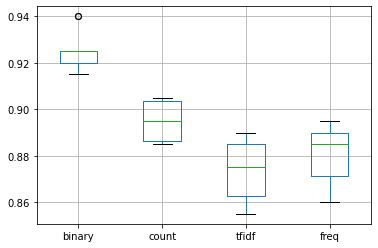

In [81]:
#box and whisker plot of the results is also presented, summarizing the accuracy distributions
#per configuration. We can see that binary achieved the best results with a modest spread and
#might be the preferred approach for this dataset


import matplotlib.pyplot as plt
results.boxplot()
plt.show()

### Predicting sentiment for new reviews



In [85]:
# Classify a review as negative or positive
def predict_sentiment(review,vocab,tokenizer,model):
    
    #clean the review
    text = preprocessing_pipeline(review)
    #filter by vocab
    tokens = [t for t in text if t in vocab]
    #convert to linr
    line = ' '.join(tokens)
    #encode
    encoded = tokenizer.texts_to_matrix([line],mode='binary')
    #predict sentiment
    yhat = model.predict(encoded)
    #retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos),'Negative'
    return percent_pos,'Positive'

In [86]:
# text positive review
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


Review: [Best movie ever! It was great, I recommend it.]
Sentiment: Positive (99.998%)


In [87]:
# text negative review
text ='nah i dunno mate'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [nah i dunno mate]
Sentiment: Negative (99.349%)
